In [29]:
import numpy as np
from doctr.models import ocr_predictor
from doctr.io import DocumentFile
from PIL import Image

model = ocr_predictor("db_resnet50", "crnn_vgg16_bn", pretrained=True)
img = "wi_800.jpg"
single_img_doc = DocumentFile.from_images(img)

result = model(single_img_doc)
json_output = result.export()

In [44]:
for i in json_output["pages"][0]["blocks"]:
    for j in i["lines"]:
        for k in j['words']:
            print(k["value"])
    


Walter
J.Ong
Sozluve
Yazili
Kultur
SOZON
TEKNOLOJILESMESI
metis
o


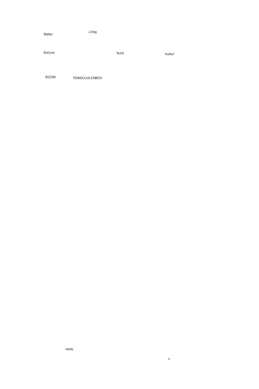

In [23]:
import matplotlib.pyplot as plt

synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

In [28]:
from doctr.io import DocumentFile
from doctr.models import kie_predictor

# Model
model = kie_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)
# PDF
doc = DocumentFile.from_images(img)
# Analyze
result = model(doc)

predictions = result.pages[0].predictions
for class_name in predictions.keys():
    list_predictions = predictions[class_name]
    for prediction in list_predictions:
        print(f"Prediction for {class_name}: {prediction}")

AttributeError: 'Page' object has no attribute 'predictions'

In [27]:
result

KIEDocument(
  (pages): [KIEPage(
    dimensions=(1235, 800)
    (predictions): {'words': [Prediction(value='Walter', confidence=0.99, bounding_box=((0.139691162109375, 0.0634765625), (0.3371826171875, 0.0986328125))), Prediction(value='J.Ong', confidence=0.98, bounding_box=((0.326629638671875, 0.056640625), (0.53316650390625, 0.111328125))), Prediction(value='Sozluve', confidence=0.87, bounding_box=((0.13818359375, 0.1123046875), (0.438189697265625, 0.1650390625))), Prediction(value='Yazili', confidence=0.94, bounding_box=((0.44271240234375, 0.1142578125), (0.640203857421875, 0.16015625))), Prediction(value='Kultur', confidence=1.0, bounding_box=((0.646234130859375, 0.1162109375), (0.8678466796875, 0.1591796875))), Prediction(value='SOZON', confidence=0.89, bounding_box=((0.145721435546875, 0.1787109375), (0.2587890625, 0.2080078125))), Prediction(value='TEKNOLOJILESMESI', confidence=0.55, bounding_box=((0.26180419921875, 0.181640625), (0.558795166015625, 0.208984375))), Prediction(va